In [79]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'news.csv')
#shape of dataset
df.shape

(6335, 4)

In [3]:
#Head of dataset
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
#labels of dataset
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [5]:
#Distribution of labels
print(labels.value_counts())

REAL    3171
FAKE    3164
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

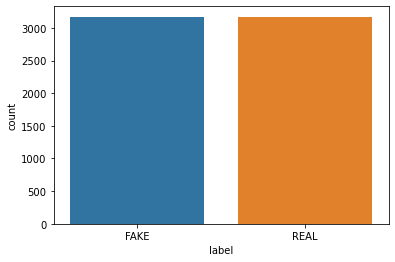

In [8]:
"""Dataset is balanced 'FAKE' & 'REAL' labels have ~equal amount of data """
sns.countplot(df['label'])

In [9]:
#Encoding labels 

label = LabelEncoder()
df['label']=label.fit_transform(df['label'])

In [10]:
"Split dataset into Training and Testing"
x_train,x_test,y_train,y_test = train_test_split(df['text'],df['label'],test_size=0.2,random_state=57)

In [13]:
#Initializing TfIdf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.8)

#Fit & Transform train set and trasform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train)

In [14]:
tfidf_test  = tfidf_vectorizer.transform(x_test)

In [64]:
#Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()
pac.fit(tfidf_train,y_train)

#predicting on test set and calculating accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_pred,y_test)
print(f'accuracy_score : {round(score*100,2)}%')

accuracy_score : 94.32%


In [67]:
#Confusion Matrix
confusion_matrix(y_test,y_pred, labels=[0,1])

array([[599,  35],
       [ 37, 596]], dtype=int64)

In [80]:
#Classification Report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       636
           1       0.94      0.94      0.94       631

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [71]:
#Cross validation Score

cv_score = cross_val_score(pac,tfidf_vectorizer.fit_transform(df['text']),df['label'],cv = 5)
cv_mean=cv_score.mean()
cv_mean*100

93.89108129439622

In [72]:
auc = roc_auc_score(y_test,y_pred)

In [73]:
auc

0.9431715679678663

In [74]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [75]:
fpr

array([0.        , 0.05520505, 1.        ])

In [76]:
tpr

array([0.        , 0.94154818, 1.        ])

In [77]:
thresholds

array([2, 1, 0])

[]

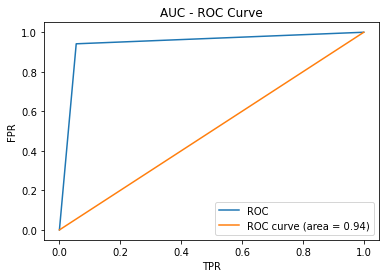

In [78]:
#Plot AUC - ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],label='ROC curve (area = %0.2f)'%auc)
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.title('AUC - ROC Curve')
plt.legend()
plt.plot()

# Observation :- 